In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import colour # install from http://colour-science.org/installation-guide/
from colour.plotting import * # install the accessory modules per colour-science website instructions
%matplotlib inline

Source File Requirments: Spectra begins at 365 nm, ends at 830 nm, and has a spectral resolution of 5 nm.  Data wrangling may be required to generate a conforming file.

In [121]:
Lamp = pd.read_csv('D:/CW Spectral Eval - Feb 2nd/LE174-H00-N50-2A DOE.csv')
# Lamp.head()
# Lamp.columns[0]
Lamp = Lamp.rename(columns = {Lamp.columns[0]:'Wavelength', Lamp.columns[1]:'Irradiance'})
desr = 'Cool White LED'
Lamp = Lamp[0:94] # sets up the file to have a start value at 365 nm and an end value at 830 nm

In [122]:
def color(Lamp_Spectrum): 
    xyz = pd.read_csv('D:\Python_Database\XYZ_Color_Function.csv')
    xyz = xyz.rename(columns = {xyz.columns[1]:'X', xyz.columns[2]:'Y', xyz.columns[3]:'Z'})
    X, Y, Z = np.sum(xyz[0:94]['X']*Lamp_Spectrum), np.sum(xyz[0:94]['Y']*Lamp_Spectrum), np.sum(xyz[0:94]['Z']*Lamp_Spectrum) 
    x, y = X/(X+Y+Z), Y/(X+Y+Z)
    return x, y

In [123]:
def CIE1931(x_coor, y_coor):
    CIE_1931 = pd.read_csv('D:\Python_Database\CIE1931_1nm.csv')
    CIE_1931 = CIE_1931.rename(columns = {CIE_1931.columns[0]:'x', CIE_1931.columns[1]:'y'})                    
    plt.plot(CIE_1931['x'], CIE_1931['y'], linewidth = 0.5)
    plt.plot(x_coor, y_coor, 'ro', markersize = 10)
    plt.grid()
    plt.xlabel('x'), plt.ylabel('y')
    plt.text(0.4, 0.8, desr)
    plt.gca().set_aspect('equal', adjustable='box') 
    Blackbody = pd.read_csv('D:/Python_Database/BlackBody_xy.csv')
    Blackbody = Blackbody.rename(columns = {Blackbody.columns[0]:'x_bb', Blackbody.columns[1]:'y_bb'})  
    plt.title('1931 CIE Chart')
    plt.plot(Blackbody['x_bb'], Blackbody['y_bb'], '--', color = 'black', linewidth = 0.5)
    return plt.show()

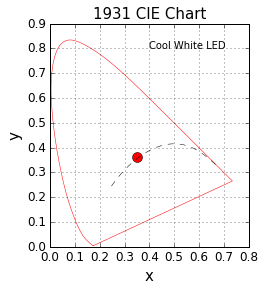

In [124]:
CIE1931(color(Lamp['Irradiance'])[0], color(Lamp['Irradiance'])[1]) # runs two functions within a function

In [125]:
def CIE1931(x_coor, y_coor):
    plt.plot(x_coor, y_coor, 'ro', markersize = 10)
    Blackbody = pd.read_csv('D:/Python_Database/BlackBody_xy.csv')
    Blackbody = Blackbody.rename(columns = {Blackbody.columns[0]:'x_bb', Blackbody.columns[1]:'y_bb'})  
    plt.plot(Blackbody['x_bb'], Blackbody['y_bb'], '--', color = 'black', linewidth = 0.5)
    return CIE_1931_chromaticity_diagram_plot(standalone = False)

True

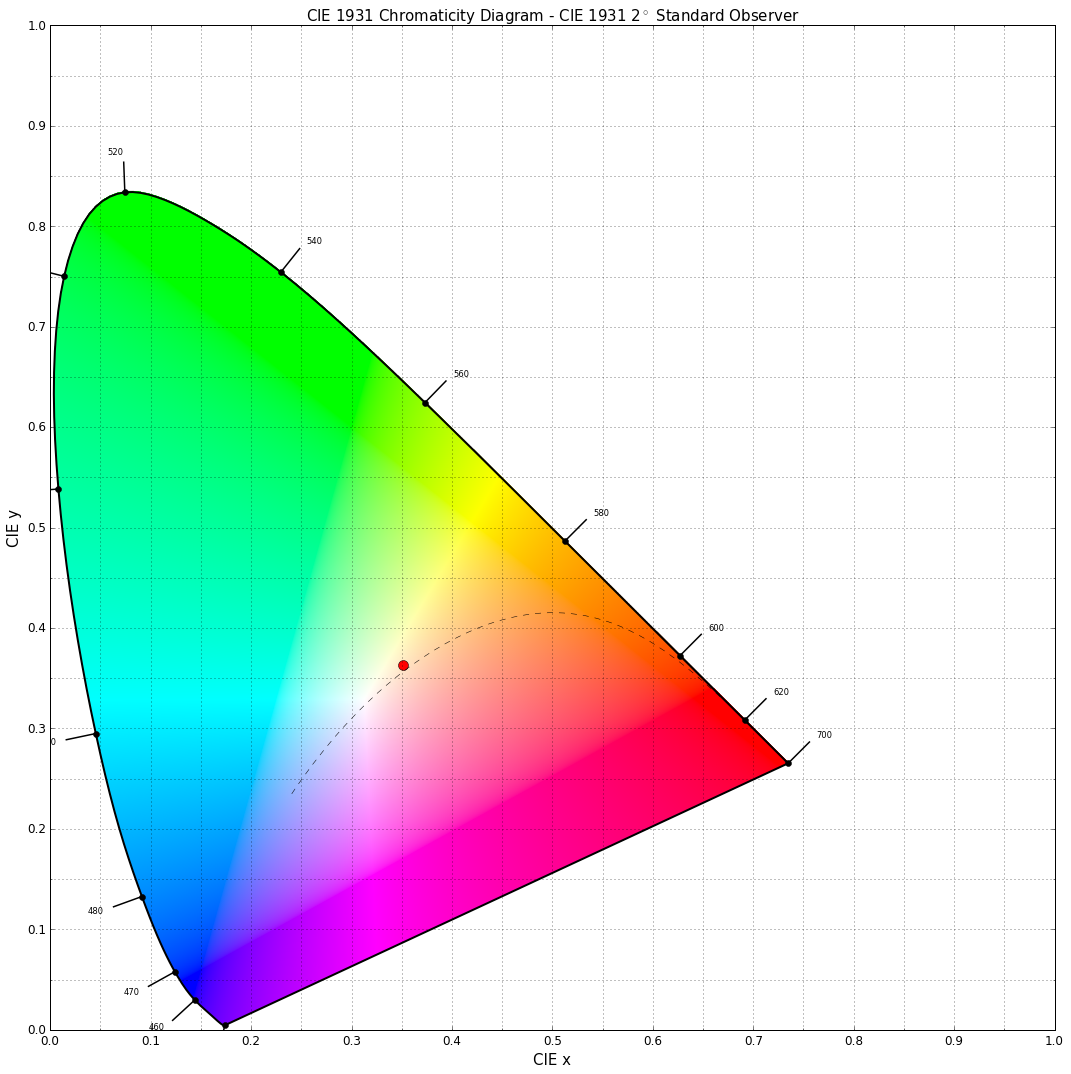

In [126]:
CIE1931(color(Lamp['Irradiance'])[0], color(Lamp['Irradiance'])[1])